## Problem 1: Linear Regression

### You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.



In [1]:
import numpy as np   
import pandas as pd 
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')
%matplotlib inline 
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from scipy.stats import zscore

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [2]:
diamond = pd.read_csv('cubic_zirconia.csv').drop('Unnamed: 0',axis=1)

#### Observing the first 5 obsrvations of the dataset

In [3]:
diamond.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


#### Checking for Missing Values

In [4]:
diamond.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

#### Checking for the Data Types

In [5]:
diamond.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

#### Dimension of the Dataset

In [6]:
diamond.shape 

(26967, 10)

#### Information of the Dataset

In [7]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.1+ MB


#### Data Summary- Measures of Central Tendency & Measures of Dispersion

In [8]:
diamond.describe(include='all')

,carat,cut,color,clarity,depth,table,x,y,z,price
count,26967.000000,26967,26967,26967,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10816,5661,6571,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.798375,NaN,NaN,NaN,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,NaN,NaN,NaN,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,NaN,NaN,NaN,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,NaN,NaN,NaN,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000


In [9]:
diamond.mode()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.3,Ideal,G,SI1,62.0,56.0,4.38,4.35,2.69,544


In [10]:
print(diamond.var())

carat    2.282407e-01
depth    1.996174e+00
table    4.982127e+00
x        1.273549e+00
y        1.359690e+00
z        5.192984e-01
price    1.619954e+07
dtype: float64


In [11]:
diamond.quantile(0.75) - diamond.quantile(0.25)

carat       0.65
depth       1.50
table       3.00
x           1.84
y           1.83
z           1.14
price    4415.00
dtype: float64

In [12]:
cv = diamond.std()/diamond.mean()
print(cv)

carat    0.598397
depth    0.022882
table    0.038848
x        0.196954
y        0.203374
z        0.203678
price    1.021664
dtype: float64


#### Shape of the Data

In [13]:
diamond.skew() 

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

#### Five Number Summary

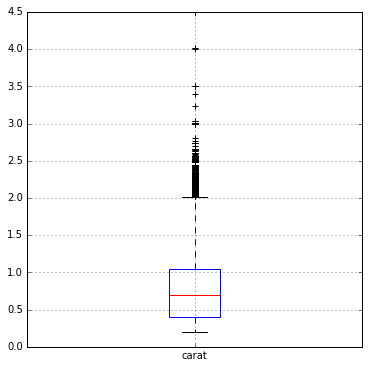

In [14]:
diamond.boxplot(column="carat",figsize=(6,6))

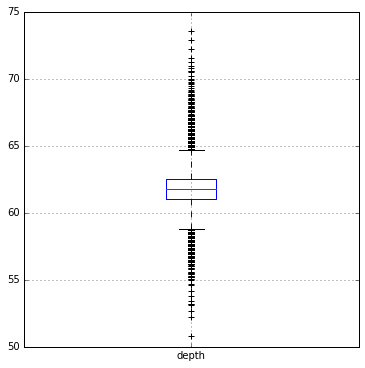

In [15]:
diamond.boxplot(column="depth",figsize=(6,6))

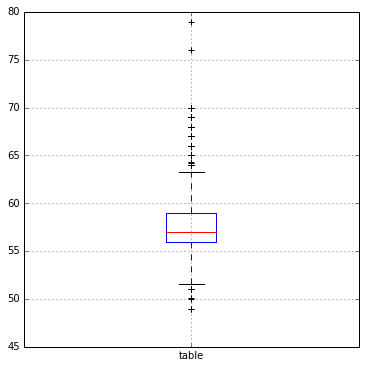

In [16]:
diamond.boxplot(column="table",figsize=(6,6))

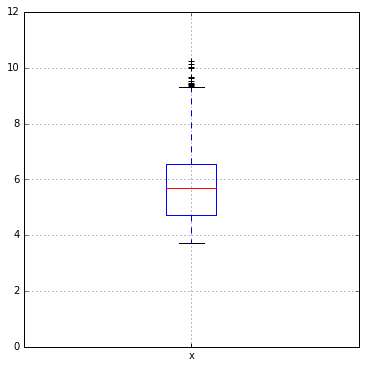

In [17]:
diamond.boxplot(column="x",figsize=(6,6))

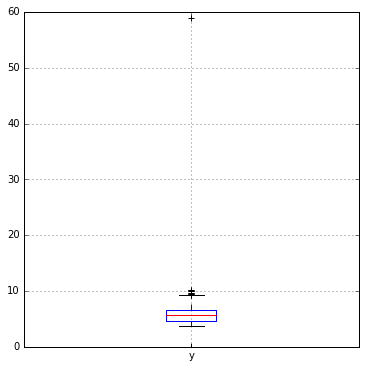

In [18]:
diamond.boxplot(column="y",figsize=(6,6))

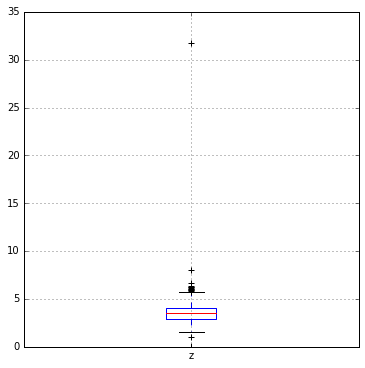

In [19]:
diamond.boxplot(column="z",figsize=(6,6))

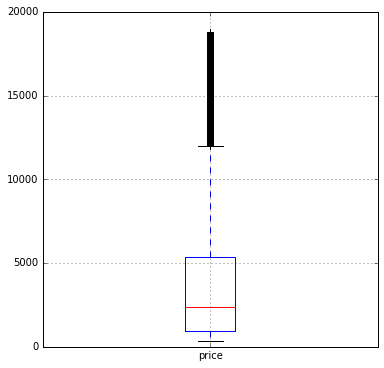

In [20]:
diamond.boxplot(column="price",figsize=(6,6))

#### Covariance & Correlation of the Data

In [21]:
diamond.cov()

,carat,depth,table,x,y,z,price
carat,0.228241,0.023844,0.193742,0.526403,0.524250,0.323839,1.773678e+03
depth,0.023844,1.996174,-0.939265,-0.029813,-0.040760,0.100411,-1.459691e+01
table,0.193742,-0.939265,4.982127,0.494228,0.474596,0.239574,1.140420e+03
x,0.526403,-0.029813,0.494228,1.273549,1.266851,0.777946,4.025446e+03
y,0.524250,-0.040760,0.474596,1.266851,1.359690,0.780563,4.018538e+03
z,0.323839,0.100411,0.239574,0.777946,0.780563,0.519298,2.466906e+03
price,1773.677848,-14.596911,1140.419986,4025.446081,4018.537829,2466.905683,1.619954e+07


In [22]:
diamond.corr()

,carat,depth,table,x,y,z,price
carat,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


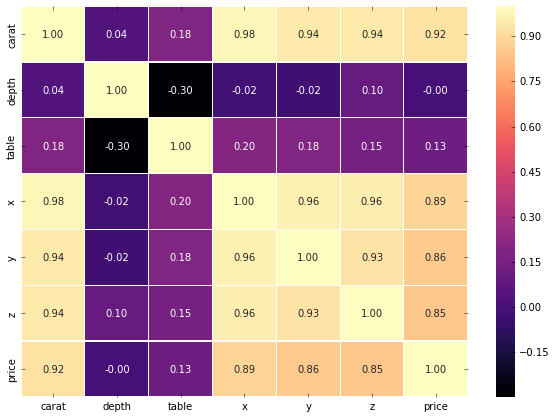

In [23]:
fig,ax = plt.subplots(figsize=(10,7))   
sns.heatmap(diamond.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning, or do we need to change them or drop them? Do you think scaling is necessary in this case?

In [24]:
diamond.fillna(diamond.median(), inplace=True)

In [25]:
print(diamond.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64


In [26]:
dups = diamond.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [27]:
diamond.drop_duplicates(inplace=True)

In [28]:
print(diamond[diamond['carat']==0].index.tolist())
print(diamond[diamond['depth']==0].index.tolist())
print(diamond[diamond['table']==0].index.tolist())
print(diamond[diamond['x']==0].index.tolist())
print(diamond[diamond['y']==0].index.tolist())
print(diamond[diamond['z']==0].index.tolist())
print(diamond[diamond['price']==0].index.tolist())

[]
[]
[]
[5821, 17506]
[5821, 17506]
[5821, 6034, 10827, 12498, 12689, 17506, 18194, 23758]
[]


In [29]:
num_missing = (diamond[['carat','depth','table','x','y','z','price']] == 0).sum()
print(num_missing)

carat    0
depth    0
table    0
x        2
y        2
z        8
price    0
dtype: int64


In [30]:
diamond[['carat','depth','table','x','y','z','price']] == 0

,carat,depth,table,x,y,z,price
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
26962,False,False,False,False,False,False,False
26963,False,False,False,False,False,False,False
26964,False,False,False,False,False,False,False
26965,False,False,False,False,False,False,False


In [31]:
diamond = diamond.replace(0, np.nan)

In [32]:
# drop rows with missing values
diamond.dropna(inplace=True)
# summarize the shape of the data with missing rows removed
print(diamond.shape)

(26925, 10)


In [33]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [34]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

In [35]:
dtypes_1=diamond.dtypes[(diamond.dtypes!='uint8') & (diamond.dtypes!='bool') & (diamond.dtypes!= 'object')].index
for column in diamond[dtypes_1].columns:
    lr,ur=remove_outlier(diamond[column])
    diamond[column]=np.where(diamond[column]>ur,ur,diamond[column])
    diamond[column]=np.where(diamond[column]<lr,lr,diamond[column])

### 1.3 Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using Rsquare, RMSE.

In [36]:
diamond['cut']=np.where(diamond['cut'] =='Fair', '0', diamond['cut'])
diamond['cut']=np.where(diamond['cut'] =='Good', '1', diamond['cut'])
diamond['cut']=np.where(diamond['cut'] =='Very Good', '2', diamond['cut'])
diamond['cut']=np.where(diamond['cut'] =='Premium', '3', diamond['cut'])
diamond['cut']=np.where(diamond['cut'] =='Ideal', '4', diamond['cut'])

In [37]:
diamond['color']=np.where(diamond['color'] =='J', '0', diamond['color'])
diamond['color']=np.where(diamond['color'] =='I', '1', diamond['color'])
diamond['color']=np.where(diamond['color'] =='H', '2', diamond['color'])
diamond['color']=np.where(diamond['color'] =='G', '3', diamond['color'])
diamond['color']=np.where(diamond['color'] =='F', '4', diamond['color'])
diamond['color']=np.where(diamond['color'] =='E', '5', diamond['color'])
diamond['color']=np.where(diamond['color'] =='D', '6', diamond['color'])

In [38]:
diamond['clarity']=np.where(diamond['clarity'] =='I3', '0', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='I2', '1', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='I1', '2', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='SI2', '3', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='SI1', '4', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='VS2', '5', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='VS1', '6', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='VVS2', '7', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='VVS1', '8', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='IF', '9', diamond['clarity'])
diamond['clarity']=np.where(diamond['clarity'] =='FL', '10', diamond['clarity'])

In [39]:
diamond['cut'] = diamond['cut'].astype('int64')
diamond['color'] = diamond['color'].astype('int64')
diamond['clarity'] = diamond['clarity'].astype('int64')

In [40]:
diamond.dtypes

carat      float64
cut          int64
color        int64
clarity      int64
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

In [41]:
diamond_z = diamond.apply(zscore)
diamond_z.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,-1.067382,0.979367,0.940777,-0.640136,0.286766,0.261968,-1.296530,-1.289659,-1.261558,-0.933395
1,-1.002446,0.080980,-0.231548,2.396449,-0.780365,0.261968,-1.163253,-1.137530,-1.204060,-0.793477
2,0.231349,-0.817407,0.940777,1.181815,0.368853,1.189326,0.276134,0.347964,0.348406,0.736960
3,-0.807636,0.979367,0.354615,0.574498,-0.123669,-0.665390,-0.807849,-0.833272,-0.830318,-0.765205
4,-1.045737,0.979367,0.354615,1.789132,-1.108713,0.725647,-1.225449,-1.164377,-1.275933,-0.852618


In [42]:
X = diamond_z.drop('price', axis=1)

# Copy target into the y dataframe. 
Y = diamond_z[['price']]

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)

In [44]:
X_test.shape

(8078, 9)

In [45]:
trainset = pd.concat([X_train, Y_train], axis=1)
testset = pd.concat([X_test,Y_test],axis=1)
trainset.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
5030,0.664259,-1.715794,0.940777,-1.247452,1.271811,-0.665390,0.711505,0.759608,0.880269,0.095359
12108,0.469450,-0.817407,1.526940,-1.247452,1.846420,-0.665390,0.507147,0.580632,0.750897,0.412986
20181,-0.266498,-1.715794,-1.403873,-0.032819,-0.862452,1.838477,-0.114810,-0.081576,-0.183457,-0.584611
4712,-0.071688,-1.715794,-0.231548,-0.640136,-2.257931,2.580364,0.285019,0.213733,-0.097209,-0.371417
2548,0.469450,0.080980,-0.231548,0.574498,0.861376,0.725647,0.569343,0.544837,0.650274,0.831873


In [46]:
trainset.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [47]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula='price ~ carat + cut + color + clarity + depth + table + x + y + z', data = trainset).fit()
lm1.params

Intercept   -0.000292
carat        1.184475
cut          0.036393
color        0.134473
clarity      0.207537
depth        0.012457
table       -0.009376
x           -0.437915
y            0.503506
z           -0.194773
dtype: float64

In [48]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.834e+04
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        19:53:03   Log-Likelihood:                -1472.3
No. Observations:               18847   AIC:                             2965.
Df Residuals:                   18837   BIC:                             3043.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0003      0.002     -0.153      0.8

In [49]:
mse = np.mean((lm1.predict(trainset.drop('price',axis=1))-trainset['price'])**2)

In [50]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.26163092383676884

In [51]:
np.sqrt(lm1.mse_resid)

0.2617003606393495

In [52]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (1.18) * carat + (0.04) * cut + (0.13) * color + (0.21) * clarity + (0.01) * depth + (-0.01) * table + (-0.44) * x + (0.5) * y + (-0.19) * z + 

#### Using Linear Model from Sci-kit learn library

#### Fit the model to the training set

In [53]:
regression_model = LinearRegression()
regression_model.fit(X_train, Y_train)

LinearRegression()

In [54]:
regression_model.coef_

array([[ 1.18447547,  0.03639268,  0.13447266,  0.20753687,  0.01245742,
        -0.00937568, -0.43791476,  0.50350613, -0.19477299]])

In [55]:
regression_model.intercept_

array([-0.00029197])

#### Get the score on training set

In [56]:
print('The coefficient of determination R^2 of the prediction on Train set',regression_model.score(X_train, Y_train))

The coefficient of determination R^2 of the prediction on Train set 0.9312287832968958


#### Get the score on test set

In [57]:
print('The coefficient of determination R^2 of the prediction on Test set',regression_model.score(X_test, Y_test))

The coefficient of determination R^2 of the prediction on Test set 0.9316264205922415


#### Get the RMSE on train set

In [58]:
print("The Root Mean Square Error (RMSE) of the model is for training set is",np.sqrt(mean_squared_error(Y_train,regression_model.predict(X_train))))

The Root Mean Square Error (RMSE) of the model is for training set is 0.26163092383676895


#### Get the RMSE on test set

In [59]:
print("The Root Mean Square Error (RMSE) of the model is for testing set is",np.sqrt(mean_squared_error(Y_test,regression_model.predict(X_test))))

The Root Mean Square Error (RMSE) of the model is for testing set is 0.26289869575092717


In [60]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])] 

In [61]:
i=0
for column in X.columns:
    if i < 15:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 32.89128404185397
cut ---> 1.509589884516437
color ---> 1.1198594782180107
clarity ---> 1.2414523580588017
depth ---> 4.453926947877299
table ---> 1.6183480806529642
x ---> 417.3709348254094
y ---> 398.58165998578113
z ---> 234.83706069999403


In [62]:
y_pred = regression_model.predict(X_test)
np.set_printoptions(precision=3) 

In [63]:
prediction = pd.DataFrame(np.concatenate((y_pred.reshape(len(y_pred),1), Y_test.values.reshape(len(Y_test),1)),1),columns=['Predicted','Actual'])
prediction

,Predicted,Actual
0,1.313408,1.449240
1,0.324015,0.283743
2,2.810623,2.374426
3,2.281614,2.374426
4,1.408858,1.278166
...,...,...
8073,0.134291,0.261818
8074,0.169290,0.087570
8075,-1.085484,-0.900507
8076,-0.959466,-0.833866


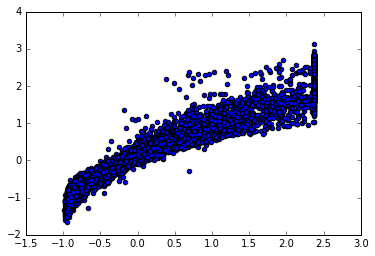

In [64]:
plt.scatter(Y_test['price'], y_pred)
#plt.title('Salary vs Experience (Test set)')
#plt.xlabel('Years of Experience')
#plt.ylabel('Salary')

### Predicting the Price - Unscaled Data

In [65]:
X_us = diamond.iloc[:,0:9]
Y_us = diamond['price']

In [66]:
X_train_us, X_test_us, Y_train_us, Y_test_us = train_test_split(X_us, Y_us, test_size=0.30 , random_state=1)

In [67]:
model = sm.OLS(Y_train_us,X_train_us).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.968
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                          6.355e+04
Date:                Sun, 01 Nov 2020   Prob (F-statistic):                        0.00
Time:                        19:53:06   Log-Likelihood:                     -1.5512e+05
No. Observations:               18847   AIC:                                  3.103e+05
Df Residuals:                   18838   BIC:                                  3.103e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       9035.3729     80.182    112.686      0.000    8878.210    9192.536
cut           93.6489      6.816     13.740      0.000      80.290     107.008
color        271.9595      4.107     66.215      0.000     263.909     280.010
clarity      433.2710      4.450     97.369      0.000     424.549     441.993
depth        -41.4275      3.732    -11.102      0.000     -48.742     -34.113
table        -29.4923      3.392     -8.695      0.000     -36.141     -22.844
x          -1512.1519    133.731    -11.307      0.000   -1774.277   -1250.026
y           1240.6457    125.869      9.857      0.000     993.930    1487.361
z           -286.1761    103.541     -2.764      0.006    -489.125     -83.227
==============================================================================
Omnibus:                     2673.859   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10118.064
Skew:                           0.681   Prob(JB):                         0.00
Kurtosis:                       6.321   Cond. No.                     2.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
Y_test_us.shape

(8078,)

In [69]:
model = LinearRegression()
model.fit(X_train_us, Y_train_us)

LinearRegression()

In [70]:
Y_pred_us = model.predict(X_test_us)
np.set_printoptions(precision=3) 

In [71]:
prediction = pd.DataFrame(np.concatenate((Y_pred_us.reshape(len(Y_pred_us),1), Y_test_us.values.reshape(len(Y_test_us),1)),1),columns=['Predicted','Actual'])
prediction

,Predicted,Actual
0,8287.158769,8758.0
1,4857.596683,4718.0
2,13477.002871,11965.0
3,11643.281714,11965.0
4,8618.019952,8165.0
...,...,...
8073,4199.950913,4642.0
8074,4321.270299,4038.0
8075,-28.192887,613.0
8076,408.627314,844.0


### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

From the above analysis, the top five important variables are:
1.	carat
2.	y
3.	x
4.	clarity
5.	z

The above five variables mainly influence the price of cubic zirconia (CZ). 
	A one unit increase in ‘carat’ will lead to 1.18 units increase in the price of cubic zirconia.

	A one unit increase in ‘y’ (Width of cubic zirconia in mm) will lead to 0.50 units increase in the price of cubic zirconia.

	A one unit increase in ‘x’ (Length of cubic zirconia in mm) will lead to 0.44 units decrease in the price of cubic zirconia.

	A one unit increase in ‘clarity’ will lead to 0.21 units increase in the price of cubic zirconia.

	A one unit increase in ‘z’ (Height of cubic zirconia in mm) will lead to 0.19 units decrease in the price of cubic zirconia.

Accordingly, Gem Stones Co Ltd., should concentrate more on increasing the ‘carat’, improving on its ‘y’ (Width) and enhancing the ‘clarity’ as these variables have a positive impact on the price. On the other hand, they should concentrate on decreasing ‘x’ (Length) and ‘z’ (Height) as they are inversely related to the price of cubic zirconia. These will help the company in pricing the CZ in such a way that they can extract maximum profit.


## Problem 2: Logistic Regression and LDA

### You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels.formula.api as sm

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [73]:
tour_travel = pd.read_csv('Holiday_Package.csv')

#### Observing the first 5 obsrvations of the dataset

In [74]:
tour_travel.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


#### Checking for Missing Values

In [75]:
tour_travel.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

#### Checking for the Data Types

In [76]:
tour_travel.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

#### Dimension of the Dataset

In [77]:
tour_travel.shape 

(872, 7)

#### Information of the Dataset

In [78]:
tour_travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


#### Data Summary- Measures of Central Tendency & Measures of Dispersion

In [79]:
tour_travel.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [80]:
tour_travel.mode()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,32197,44.0,8.0,0.0,0.0,no
1,NaN,33357,NaN,NaN,NaN,NaN,NaN
2,NaN,35341,NaN,NaN,NaN,NaN,NaN
3,NaN,36976,NaN,NaN,NaN,NaN,NaN
4,NaN,39460,NaN,NaN,NaN,NaN,NaN
5,NaN,40270,NaN,NaN,NaN,NaN,NaN
6,NaN,44280,NaN,NaN,NaN,NaN,NaN
7,NaN,46195,NaN,NaN,NaN,NaN,NaN


In [81]:
print(tour_travel.var())

Salary               5.484340e+08
age                  1.113378e+02
educ                 9.218867e+00
no_young_children    3.756096e-01
no_older_children    1.181104e+00
dtype: float64


In [82]:
tour_travel.quantile(0.75) - tour_travel.quantile(0.25)

Salary               18145.5
age                     16.0
educ                     4.0
no_young_children        0.0
no_older_children        2.0
dtype: float64

In [83]:
cv = tour_travel.std()/tour_travel.mean()
print(cv)

Salary               0.490657
age                  0.264087
educ                 0.326222
no_young_children    1.964789
no_older_children    1.105808
dtype: float64


#### Shape of the Data

In [84]:
tour_travel.skew() 

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

#### Five Number Summary

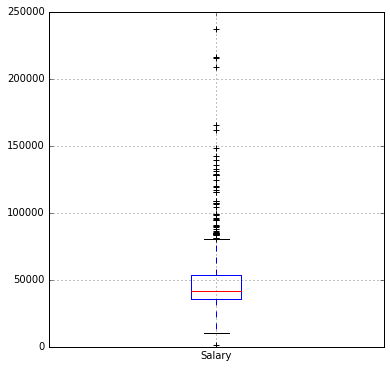

In [85]:
tour_travel.boxplot(column="Salary",figsize=(6,6))

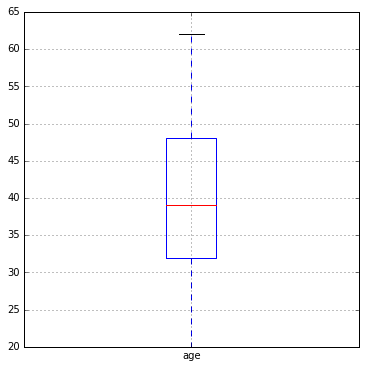

In [86]:
tour_travel.boxplot(column="age",figsize=(6,6))

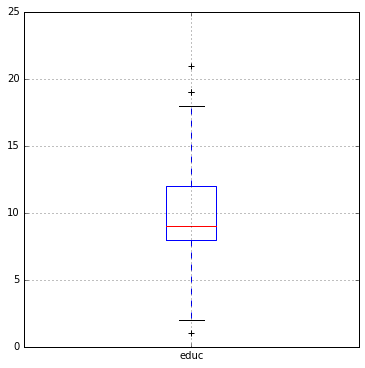

In [87]:
tour_travel.boxplot(column="educ",figsize=(6,6))

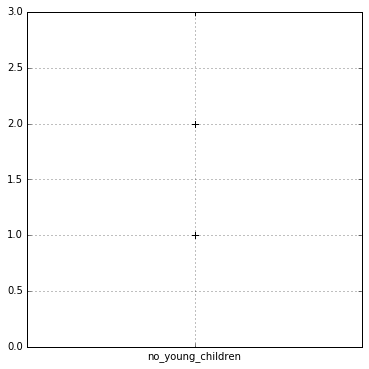

In [88]:
tour_travel.boxplot(column="no_young_children",figsize=(6,6))

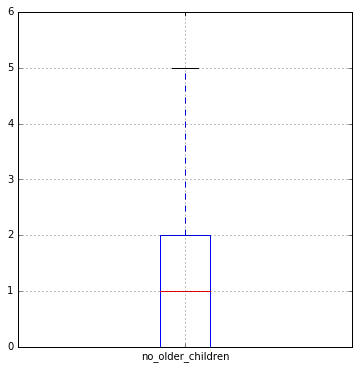

In [89]:
tour_travel.boxplot(column="no_older_children",figsize=(6,6))

In [90]:
Numeric=tour_travel.dtypes[(tour_travel.dtypes=='int64')].index.tolist()
Numeric

['Salary', 'age', 'educ', 'no_young_children', 'no_older_children']

In [91]:
for i in range(len(Numeric)):
    print("Five point summary :" , Numeric[i] )
    print("Min : " , np.percentile(tour_travel[Numeric[i]],0))
    Q3=np.percentile(tour_travel[Numeric[i]],75)
    Q1=np.percentile(tour_travel[Numeric[i]],25)
    IQR=Q3-Q1
    UL = Q3 +1.5*IQR
    LL = Q1 - 1.5*IQR
    print("L1 :", LL)
    print("Q1 : ", np.percentile(tour_travel[Numeric[i]], 25))
    print("Q2 : ", np.percentile(tour_travel[Numeric[i]], 50))
    print("Q3 : ", np.percentile(tour_travel[Numeric[i]], 75))
    print("Max : ", np.percentile(tour_travel[Numeric[i]],100))
    print("UL : ", UL)
    print("******************************")

Five point summary : Salary
Min :  1322.0
L1 : 8105.75
Q1 :  35324.0
Q2 :  41903.5
Q3 :  53469.5
Max :  236961.0
UL :  80687.75
******************************
Five point summary : age
Min :  20.0
L1 : 8.0
Q1 :  32.0
Q2 :  39.0
Q3 :  48.0
Max :  62.0
UL :  72.0
******************************
Five point summary : educ
Min :  1.0
L1 : 2.0
Q1 :  8.0
Q2 :  9.0
Q3 :  12.0
Max :  21.0
UL :  18.0
******************************
Five point summary : no_young_children
Min :  0.0
L1 : 0.0
Q1 :  0.0
Q2 :  0.0
Q3 :  0.0
Max :  3.0
UL :  0.0
******************************
Five point summary : no_older_children
Min :  0.0
L1 : -3.0
Q1 :  0.0
Q2 :  1.0
Q3 :  2.0
Max :  6.0
UL :  5.0
******************************


#### Covariance & Correlation of the Data

In [92]:
tour_travel.cov()

,Salary,age,educ,no_young_children,no_older_children
Salary,5.484340e+08,17719.779229,23218.662341,-425.752915,2895.613755
age,1.771978e+04,111.337837,-4.783024,-3.356871,-1.332573
educ,2.321866e+04,-4.783024,9.218867,0.183012,-0.119851
no_young_children,-4.257529e+02,-3.356871,0.183012,0.375610,-0.158807
no_older_children,2.895614e+03,-1.332573,-0.119851,-0.158807,1.181104


In [93]:
tour_travel.corr()

,Salary,age,educ,no_young_children,no_older_children
Salary,1.000000,0.071709,0.326540,-0.029664,0.113772
age,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,0.113772,-0.116205,-0.036321,-0.238428,1.000000


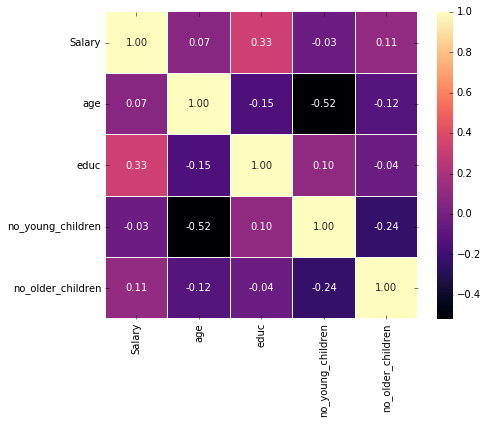

In [94]:
fig,ax = plt.subplots(figsize=(7,5.5))   
sns.heatmap(tour_travel.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") # the color intensity is based on 
plt.show()

#### Pairplot

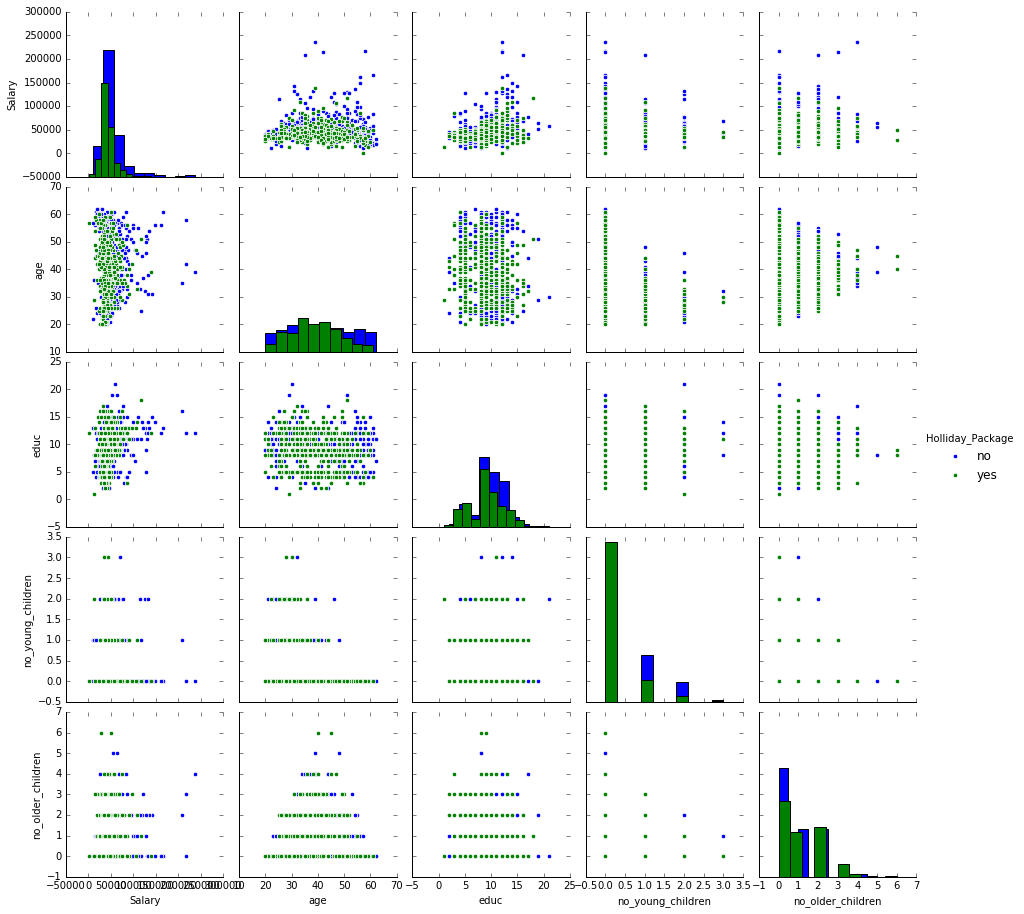

In [95]:
sns_plot = sns.pairplot(tour_travel,diag_kind='hist' ,hue='Holliday_Package')
sns_plot.savefig("output.png")

In [96]:
dups = tour_travel.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(tour_travel.shape)

Number of duplicate rows = 0
(872, 7)


### 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [97]:
for feature in tour_travel.columns: 
    if tour_travel[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(tour_travel[feature].unique()))
        print(pd.Categorical(tour_travel[feature].unique()).codes)
        tour_travel[feature] = pd.Categorical(tour_travel[feature]).codes



feature: Holliday_Package
[no, yes]
Categories (2, object): [no, yes]
[0 1]


feature: foreign
[no, yes]
Categories (2, object): [no, yes]
[0 1]


In [98]:
tour_travel.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412,30,8,1,1,0
1,1,37207,45,8,0,1,0
2,0,58022,46,9,0,0,0
3,0,66503,31,11,2,0,0
4,0,66734,44,12,0,2,0


In [99]:
tour_travel.Holliday_Package.value_counts(normalize=True)

0    0.540138
1    0.459862
Name: Holliday_Package, dtype: float64

In [100]:
tour_travel.dtypes

Holliday_Package      int8
Salary               int64
age                  int64
educ                 int64
no_young_children    int64
no_older_children    int64
foreign               int8
dtype: object

In [101]:
X = tour_travel.drop('Holliday_Package', axis=1)

y = tour_travel['Holliday_Package']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1,stratify=y)

In [103]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


## LOGISTIC REGRESSION

In [104]:
formula_1 = 'Holliday_Package~ Salary + age + educ + no_young_children + no_older_children + foreign'

In [105]:
Logistic_1 = sm.logit(formula=formula_1,data=tour_travel).fit()

Optimization terminated successfully.
         Current function value: 0.601531
         Iterations 6


In [106]:
Logistic_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       Holliday_Package   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Sun, 01 Nov 2020   Pseudo R-squ.:                  0.1281
Time:                        19:53:21   Log-Likelihood:                -524.53
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.023e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3259      0.554      4.199      0.000       1.240       3.411
Salary            -1.814e-05   4.35e-06     -4.169      0.000   -2.67e-05   -9.61e-06
age                  -0.0482      0.009     -5.314      0.000      -0.066      -0.030
educ                  0.0392      0.029      1.337      0.181      -0.018       0.097
no_young_children    -1.3173      0.180     -7.326      0.000      -1.670      -0.965
no_older_children    -0.0204      0.074     -0.276      0.782      -0.165       0.124
foreign               1.3216      0.200      6.601      0.000       0.929       1.714
=====================================================================================
"""

In [107]:
grid={'penalty':['none','l2'],
      'solver':['newton-cg','sag','lbfgs'],
      'tol':[0.0001,0.00001]}

In [108]:
model = LogisticRegression(max_iter=1000,n_jobs=2)

In [109]:
grid_search = GridSearchCV(estimator = model, param_grid = grid,n_jobs=-1, cv = 10,scoring='f1')

In [110]:
clf = grid_search.fit(X_train, y_train)

In [111]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=1000, n_jobs=2, solver='newton-cg')


In [112]:
best_model_log = grid_search.best_estimator_

In [113]:
best_model_log.intercept_

array([2.428])

In [114]:
best_model_log.coef_ 

array([[-1.641e-05, -5.545e-02,  5.595e-02, -1.288e+00, -3.983e-02,
         1.194e+00]])

## LINEAR DISCRIMINANT ANALYSIS

In [115]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda=clf.fit(X_train,y_train)

<h2>2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.</h2>

## Logistic Regression

### Predicting on Training and Test dataset 

In [116]:
y_train_predict = best_model_log.predict(X_train)
y_test_predict = best_model_log.predict(X_test)

In [117]:
y_test_predict_prob=best_model_log.predict_proba(X_test)
pd.DataFrame(y_test_predict_prob).head()

,0,1
0,0.679768,0.320232
1,0.534158,0.465842
2,0.691538,0.308462
3,0.490169,0.509831
4,0.553668,0.446332


In [118]:
accuracy_train_log= best_model_log.score(X_train, y_train)
accuracy_train_log

0.6672131147540984

In [119]:
confusion_matrix(y_train, y_train_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

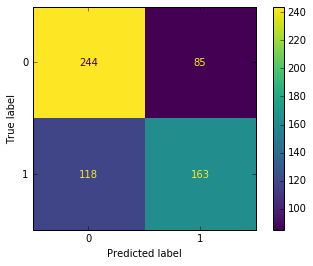

In [120]:
plot_confusion_matrix(best_model_log,X_train,y_train);

In [121]:
print(classification_report(y_train, y_train_predict))

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610



In [122]:
metrics_train_log = classification_report(y_train, y_train_predict,output_dict=True)
df=pd.DataFrame(metrics_train_log).transpose()
train_precision_log=round(df.loc["1"][0],2)
train_recall_log=round(df.loc["1"][1],2)
train_f1_log=round(df.loc["1"][2],2)
print ('Logistic Model Train Precision ',train_precision_log)
print ('Logistic Model Train Recall ',train_recall_log)
print ('Logistic Model Train F1 ',train_f1_log)

Logistic Model Train Precision  0.66
Logistic Model Train Recall  0.58
Logistic Model Train F1  0.62


AUC- Logistic Regression (Train): 0.735


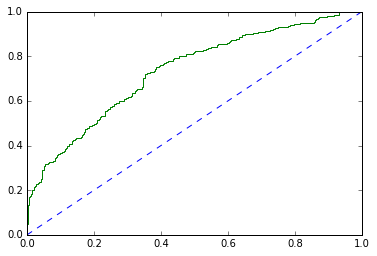

In [123]:
# predict probabilities
probs = best_model_log.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_log = roc_auc_score(y_train, probs)
print('AUC- Logistic Regression (Train): %.3f' % train_auc_log)
# calculate roc curve
train_fpr_log, train_tpr_log, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_log, train_tpr_log);

In [124]:
# Accuracy - Test Data
accuracy_test_log=best_model_log.score(X_test, y_test)
accuracy_test_log

0.6526717557251909

In [125]:
confusion_matrix(y_test, y_test_predict)

array([[108,  34],
       [ 57,  63]], dtype=int64)

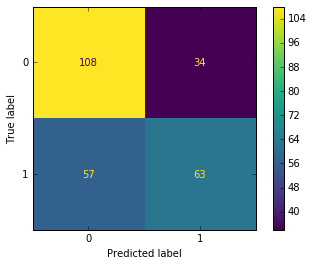

In [126]:
plot_confusion_matrix(best_model_log,X_test,y_test);

In [127]:
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.53      0.58       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



In [128]:
metrics_test_log=classification_report(y_test, y_test_predict,output_dict=True)
df=pd.DataFrame(metrics_test_log).transpose()
test_precision_log=round(df.loc["1"][0],2)
test_recall_log=round(df.loc["1"][1],2)
test_f1_log=round(df.loc["1"][2],2)
print ('LR_test_precision ',test_precision_log)
print ('LR_test_recall ',test_recall_log)
print ('LR_test_f1 ',test_f1_log)

LR_test_precision  0.65
LR_test_recall  0.52
LR_test_f1  0.58


AUC- Logistic Regression (Test): 0.716


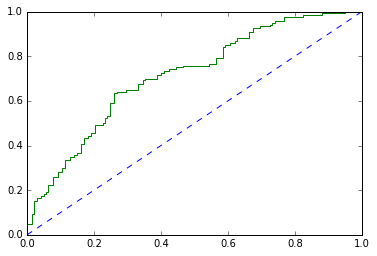

In [129]:
# predict probabilities
probs = best_model_log.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_log = roc_auc_score(y_test, probs)
print('AUC- Logistic Regression (Test): %.3f' % test_auc_log)
# calculate roc curve
test_fpr_log, test_tpr_log, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_log, test_tpr_log);

## Linear Discriminant Analysis

In [130]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = lda.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = lda.predict(X_test)

In [131]:
# Training Data Probability Prediction
pred_prob_train = lda.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = lda.predict_proba(X_test)

In [132]:
pred_prob_train[:,1]

array([0.738, 0.29 , 0.382, 0.765, 0.467, 0.443, 0.377, 0.309, 0.611,
       0.642, 0.252, 0.265, 0.399, 0.046, 0.23 , 0.362, 0.537, 0.334,
       0.63 , 0.626, 0.62 , 0.26 , 0.878, 0.33 , 0.099, 0.832, 0.207,
       0.745, 0.525, 0.186, 0.34 , 0.327, 0.379, 0.429, 0.311, 0.287,
       0.116, 0.531, 0.47 , 0.221, 0.26 , 0.81 , 0.515, 0.74 , 0.797,
       0.401, 0.298, 0.931, 0.445, 0.707, 0.755, 0.469, 0.772, 0.376,
       0.227, 0.742, 0.262, 0.525, 0.672, 0.341, 0.623, 0.577, 0.543,
       0.451, 0.564, 0.597, 0.121, 0.574, 0.389, 0.262, 0.357, 0.743,
       0.766, 0.227, 0.429, 0.173, 0.483, 0.66 , 0.563, 0.478, 0.537,
       0.564, 0.825, 0.433, 0.635, 0.759, 0.236, 0.499, 0.465, 0.296,
       0.532, 0.683, 0.818, 0.667, 0.498, 0.737, 0.21 , 0.57 , 0.398,
       0.41 , 0.452, 0.391, 0.452, 0.526, 0.276, 0.442, 0.414, 0.824,
       0.308, 0.331, 0.584, 0.256, 0.688, 0.241, 0.291, 0.395, 0.305,
       0.584, 0.138, 0.485, 0.304, 0.64 , 0.754, 0.476, 0.45 , 0.163,
       0.226, 0.488,

In [133]:
accuracy_train_LDA= lda.score(X_train, y_train)
accuracy_train_LDA

0.6639344262295082

In [134]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train))

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [135]:
metrics_LDA_train=classification_report(y_train,pred_class_train,output_dict=True)
df_3=pd.DataFrame(metrics_LDA_train).transpose()
train_precision_LDA=round(df.loc["1"][0],2)
train_recall_LDA=round(df.loc["1"][1],2)
train_f1_LDA=round(df.loc["1"][2],2)
print ('LDA_train_precision ',train_precision_LDA)
print ('LDA_train_recall ',train_recall_LDA)
print ('LDA_train_f1 ',train_f1_LDA)

LDA_train_precision  0.65
LDA_train_recall  0.52
LDA_train_f1  0.58


AUC- LDA (Train)  0.733


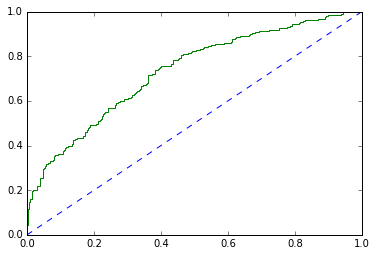

In [136]:
# predict probabilities
probs = lda.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
train_auc_LDA = roc_auc_score(y_train, probs)
print('AUC- LDA (Train)  %.3f' % train_auc_LDA)
# calculate roc curve
train_fpr_LDA,train_tpr_LDA, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr_LDA, train_tpr_LDA);

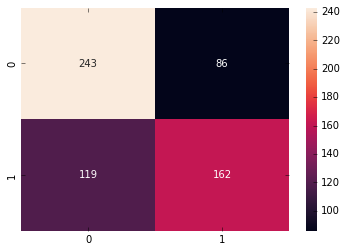

In [137]:
sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g')

In [138]:
accuracy_test_LDA = lda.score(X_test, y_test)
accuracy_test_LDA

0.6412213740458015

In [139]:
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test))

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



In [140]:
metrics_LDA_test=classification_report(y_test,pred_class_test,output_dict=True)
df_4=pd.DataFrame(metrics_LDA_test).transpose()
test_precision_LDA=round(df.loc["1"][0],2)
test_recall_LDA=round(df.loc["1"][1],2)
test_f1_LDA=round(df.loc["1"][2],2)
print ('LDA_test_precision ',test_precision_LDA)
print ('LDA_test_recall ',test_recall_LDA)
print ('LDA_test_f1 ',test_f1_LDA)

LDA_test_precision  0.65
LDA_test_recall  0.52
LDA_test_f1  0.58


AUC- LDA (Test): 0.714


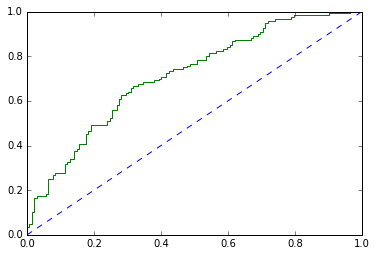

In [141]:
# predict probabilities
probs = lda.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc_LDA = roc_auc_score(y_test, probs)
print('AUC- LDA (Test): %.3f' % test_auc_LDA)
# calculate roc curve
test_fpr_LDA, test_tpr_LDA, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr_LDA, test_tpr_LDA);

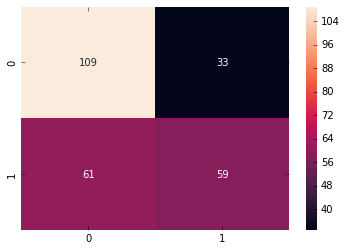

In [142]:
sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g')

# Comparison of the performance metrics from the 3 models

In [143]:
index=['Accuracy', 'AUC','Precision','Recall','F1 Score']
data = pd.DataFrame({'LR Train':[accuracy_train_log,train_auc_log,train_precision_log,train_recall_log,train_f1_log],
        'LR Test':[accuracy_test_log,test_auc_log,test_precision_log,test_recall_log,test_f1_log],
       'LDA Train':[accuracy_train_LDA,train_auc_LDA,train_precision_LDA,train_recall_LDA,train_f1_LDA],
        'LDA Test':[accuracy_test_LDA,test_auc_LDA,test_precision_LDA,test_recall_LDA,test_f1_LDA]},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.65,0.66,0.64
AUC,0.74,0.72,0.73,0.71
Precision,0.66,0.65,0.65,0.65
Recall,0.58,0.52,0.52,0.52
F1 Score,0.62,0.58,0.58,0.58


# ROC Curve for the 3 models on the Training data

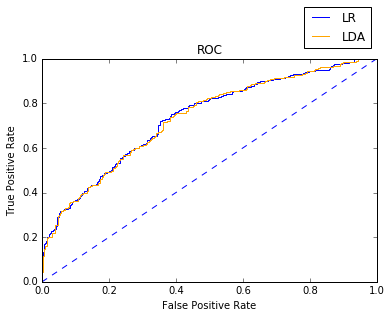

In [144]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(train_fpr_log, train_tpr_log,color='blue',label="LR")
plt.plot(train_fpr_LDA, train_tpr_LDA,color='orange',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

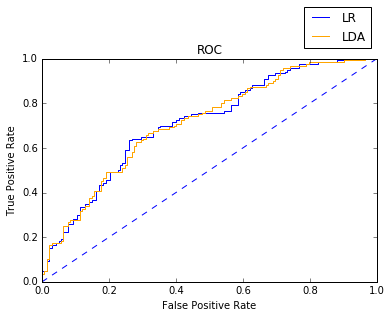

In [145]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(test_fpr_log,test_tpr_log,color='blue',label="LR")
plt.plot(test_fpr_LDA, test_tpr_LDA,color='orange',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

The most important variables are:
1.	Foreign
2.	Salary
3.	No_young_children
4.	Educ
5.	Age
6.	No_older_chilren

•	Foreigner employees of the company are more likely to opt for the holiday package as compared to the domestic employees. We can further investigate as to what could plausibly be the reason for same and formulate few strategies to attract more domestic employees of the company (as they might be larger in proportion compared to foreigners in the company). This might further help stimulating the profits for the Tour and Travel agency.

•	An increase in Salary of the employees are pushing them against opting the holiday package. This is remarkably interesting. However, this will help us take an important decision that those whose salary has increased may not be the audience of the company. There should be more schemes to attract them as they have the potential to pay for tours and in turn be one of the most profitable segment of customers.

•	With the increase in the no of young children in the employees’ family lesser are the chances that they are opting for the holiday package. It is very intuitive in the sense that spending on children for education and saving up for them might cause the employees to opt out from the package.

•	With the increase in the years of the formal education, higher are the chances they will opt for the package. Hence to some extent, the agency can also take into consideration the no of years of education of the employees while segmenting the customers.

•	With increase in the age, people are observed to have lesser and lesser interest in opting for the holiday package. This will help the agency in identifying the segment they have to target on, hence can maximise the profit.

•	With higher number of older children in the family, chances that the employees choose for the package will also reduce. This again might be influenced by the fact that children needs investments on their education and families try to save up on that instead of opting for the holiday package. This factor again needs attention as this along with the no of young children in the employees’ family may have severe effects on the profitability of the agency. So along with the holiday package provided to such category of the employees’, the agency can also provide them with the online class coupons or discounts on few course enrolment for their children to attract them into opting the package. This will help enhancing the profitability of the company.
